In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [2]:
df= pd.read_csv('zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.shape

(101, 18)

In [4]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
df['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

# Task 1:Analyse the data using the visualizations

## 1. Pairplot 

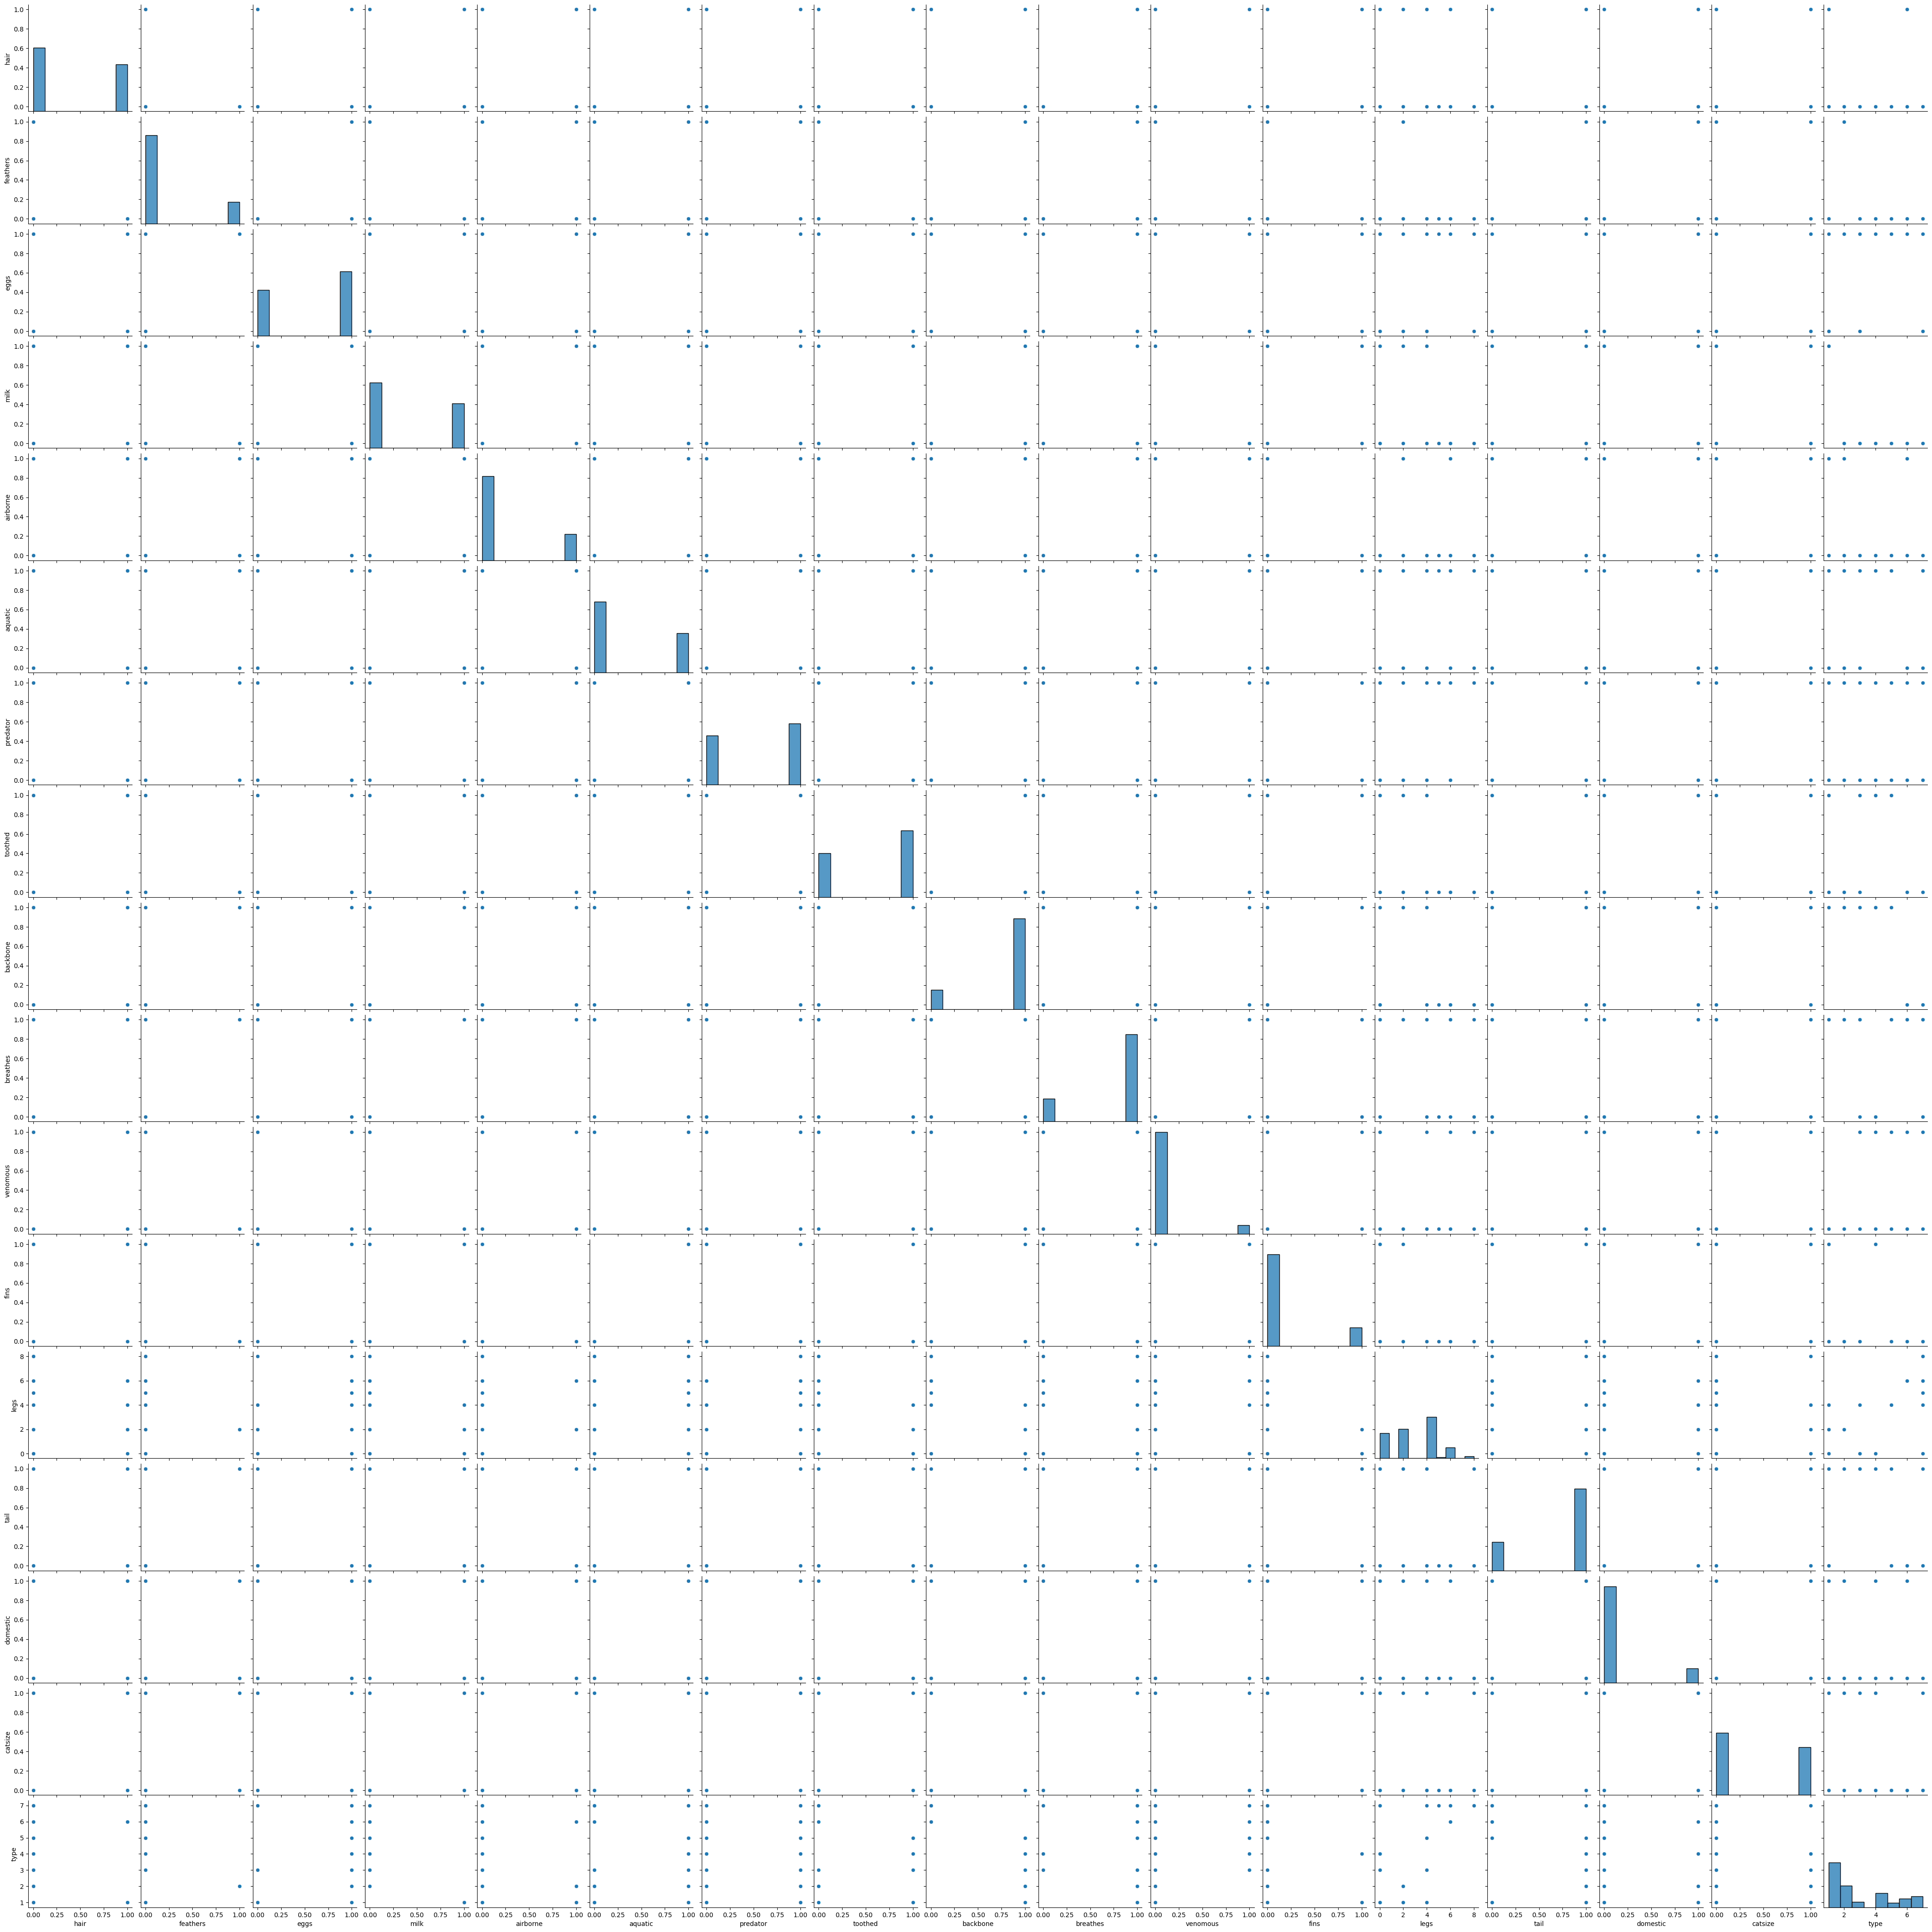

In [10]:
# Pairplot of the zoo data (without animal_name)

sns.pairplot(df.drop(columns=['animal name']))
plt.show()

## 2. Histogram

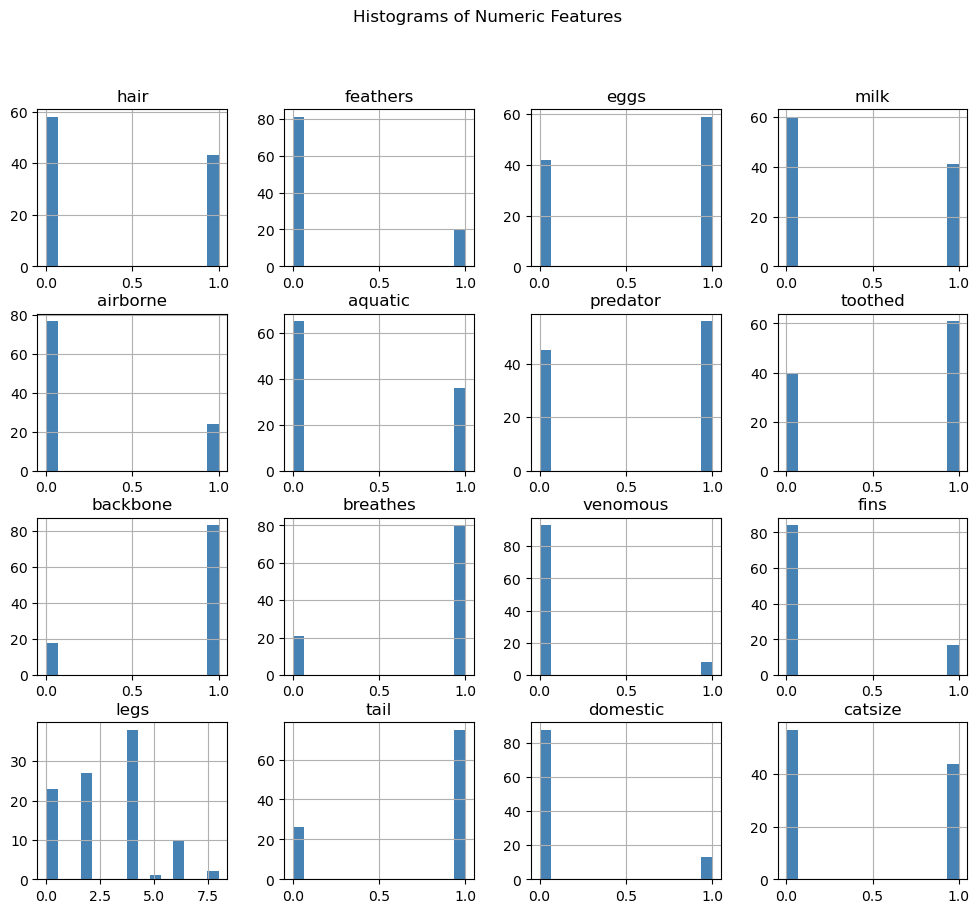

In [16]:
# Plot histograms for each feature
df.drop(columns=['animal name', 'type']).hist(figsize=(12, 10), bins=15, color='steelblue')
plt.suptitle('Histograms of Numeric Features')
plt.show()

## 3.Boxplot

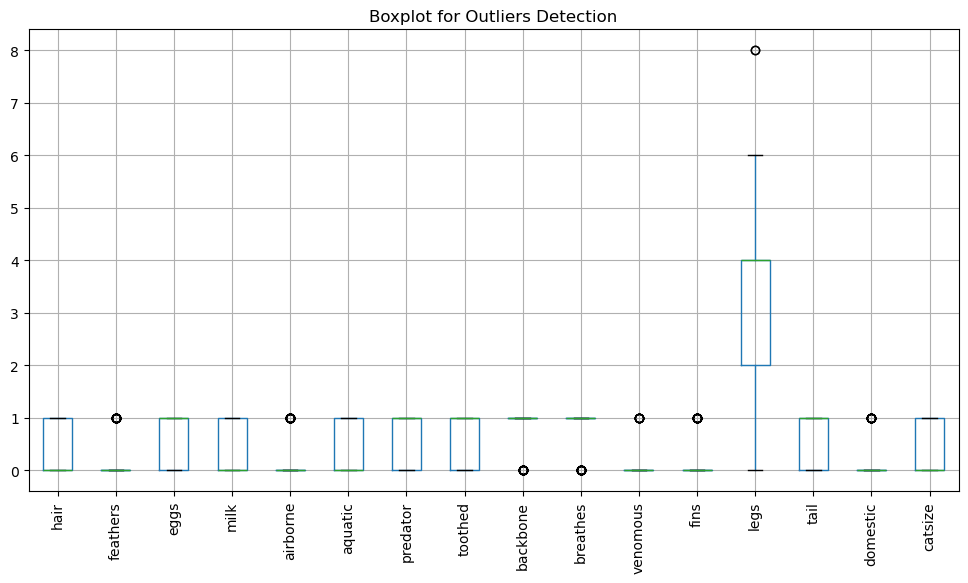

In [21]:
# Box plot for outliers detection
plt.figure(figsize=(12, 6))
df.drop(columns=['animal name', 'type']).boxplot(rot=90)
plt.title('Boxplot for Outliers Detection')
plt.show()


## 4. Bar Plot for Categorical Columns

In [23]:
import warnings  # importing warnings to remove warnings
warnings.filterwarnings('ignore')

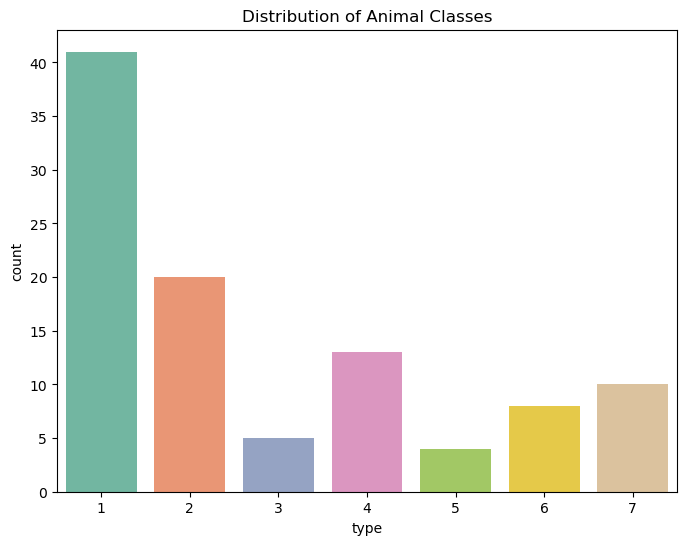

In [24]:
# plot for the target variable (type)

plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Animal Classes')
plt.show()

## 5. Heatmap (correlation matrix)

In [26]:
correlation_matrix = df.drop(columns=['animal name', 'type']).corr()

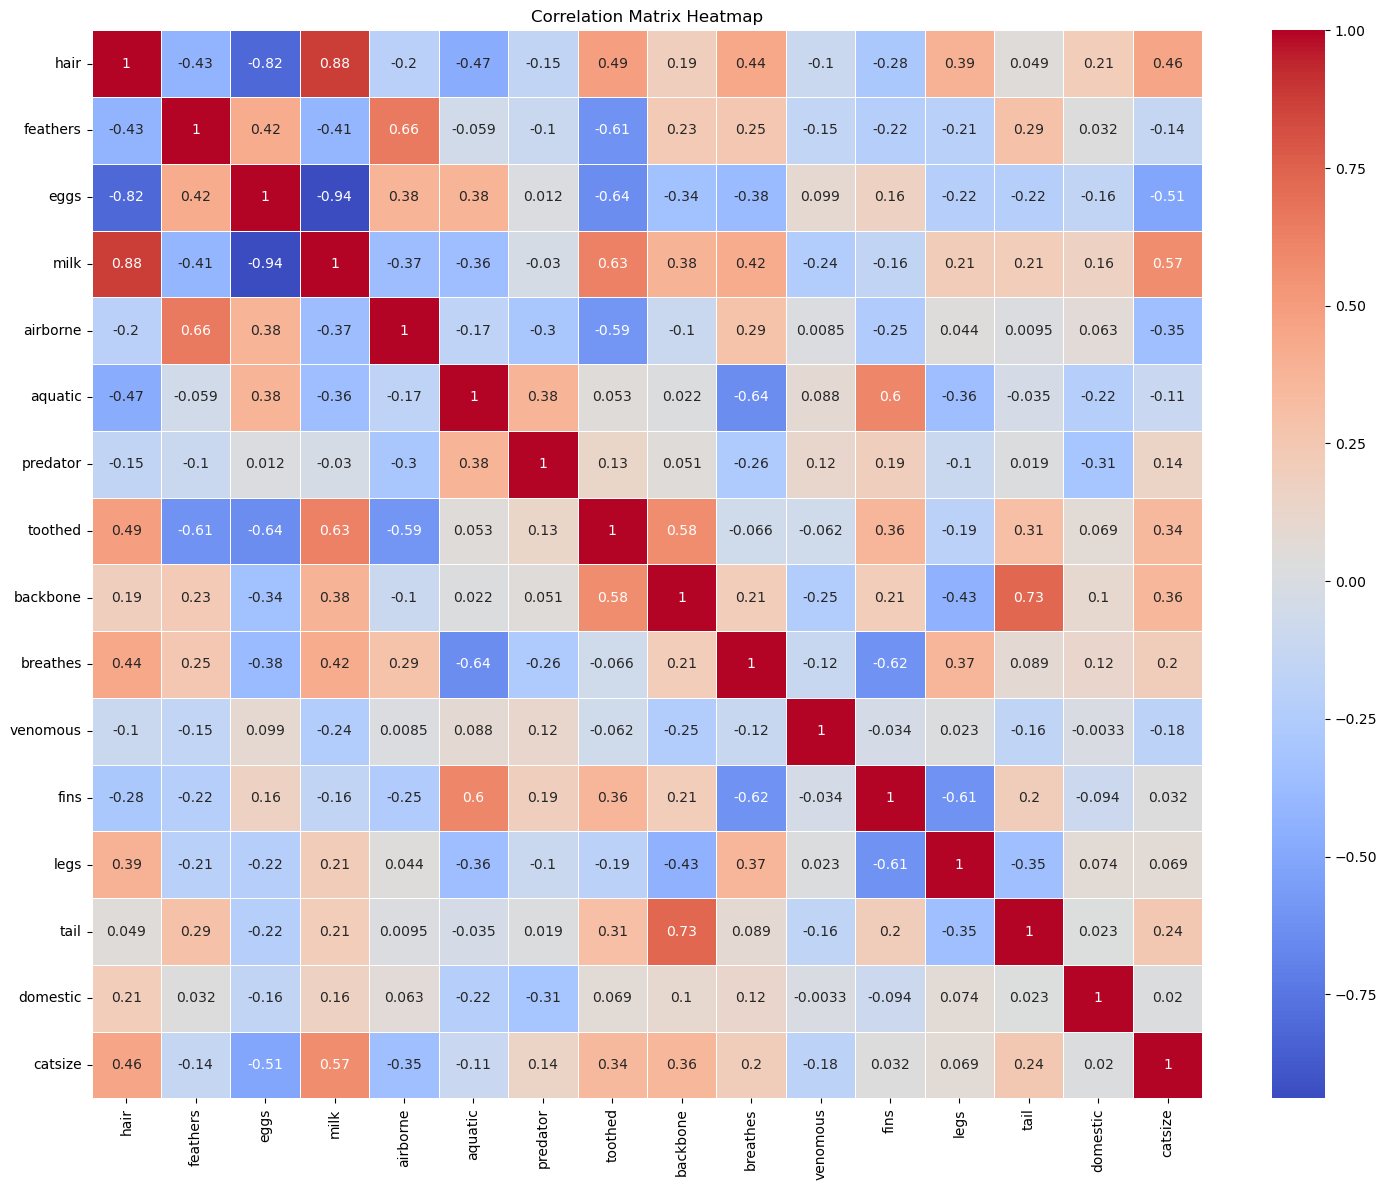

In [27]:
# Generate a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


## 6. Pairwise relation by class

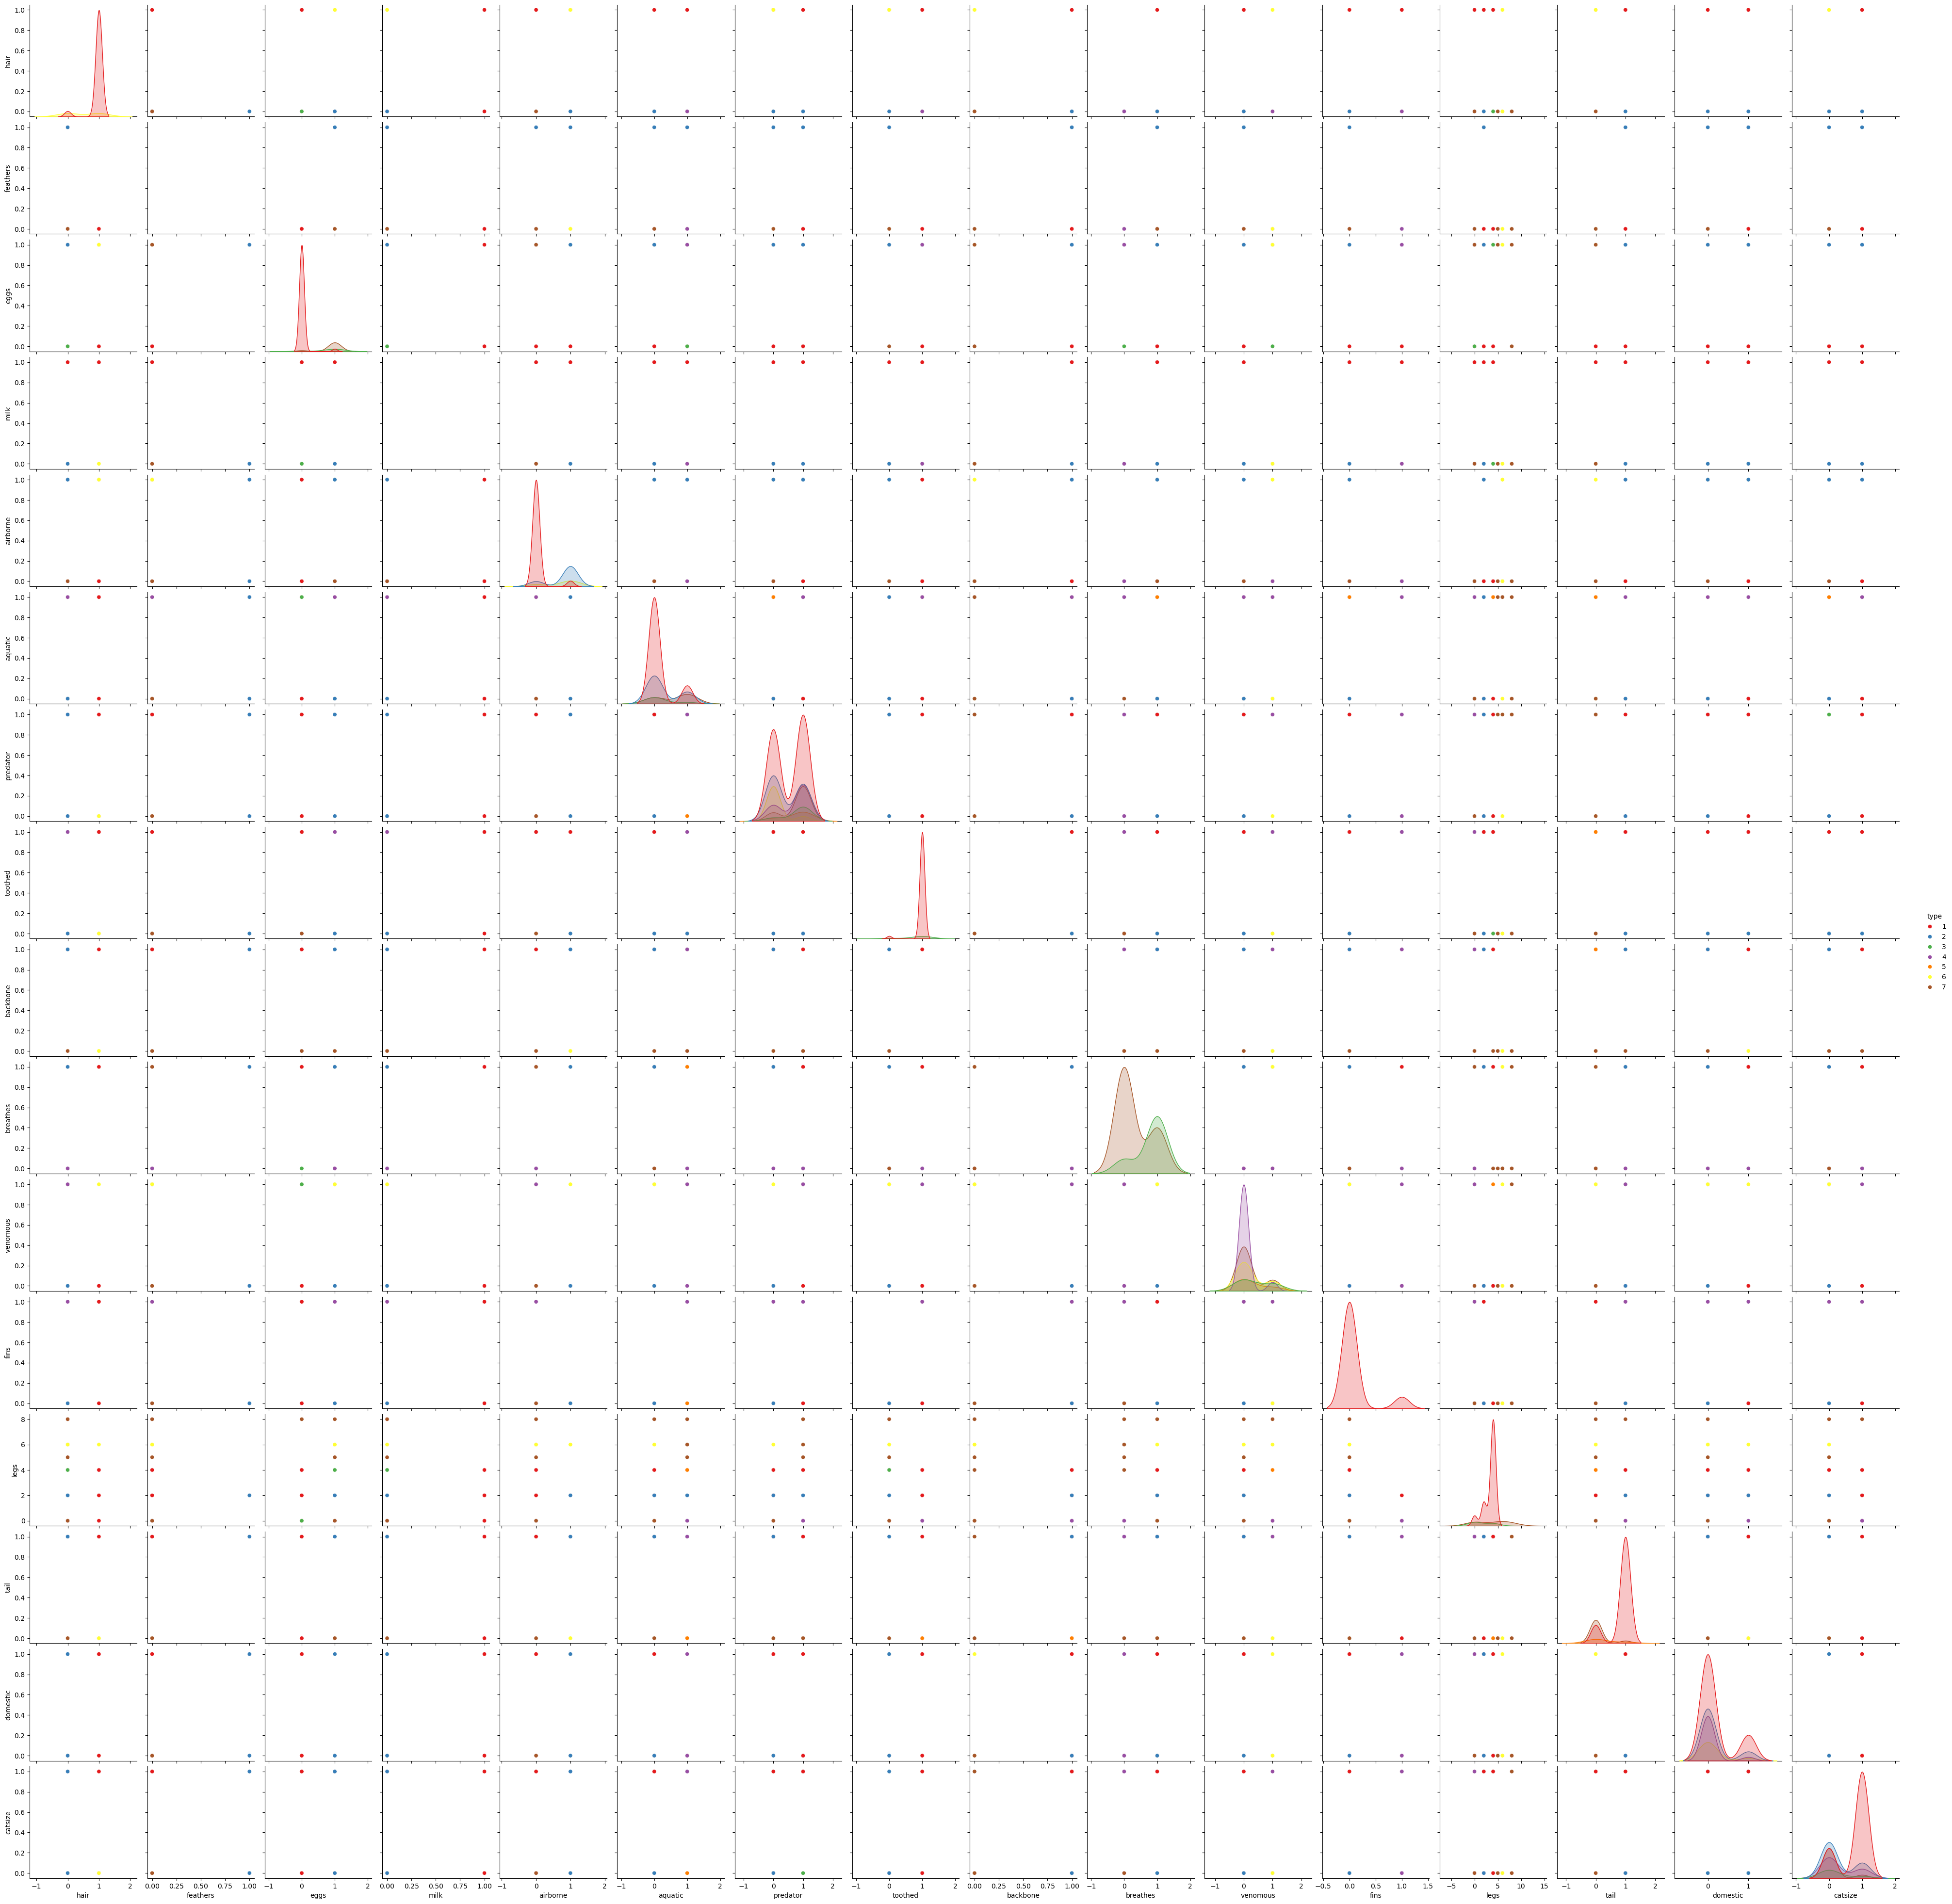

In [29]:
# Pairplot with hue for different animal classes
sns.pairplot(df.drop(columns=['animal name']), hue='type', palette='Set1')
plt.show()


# Task 2: Handle missing value and Outliers,if any.

In [31]:
# check for missing value
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [32]:
# There are no missing values.

In [33]:
df[df.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


# Task 2: check for Outliers:

In [35]:
# to find outliers we need to go for numerical colums.

In [36]:
numerical_cols= df.drop(columns=['animal name','type'])
numerical_cols

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [37]:
# Calculate IQR for each numerical column

Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR = Q3 - Q1

# Define outliers as those below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers_IQR = ((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))).sum()

print(outliers_IQR)


hair         0
feathers    20
eggs         0
milk         0
airborne    24
aquatic      0
predator     0
toothed      0
backbone    18
breathes    21
venomous     8
fins        17
legs         2
tail         0
domestic    13
catsize      0
dtype: int64


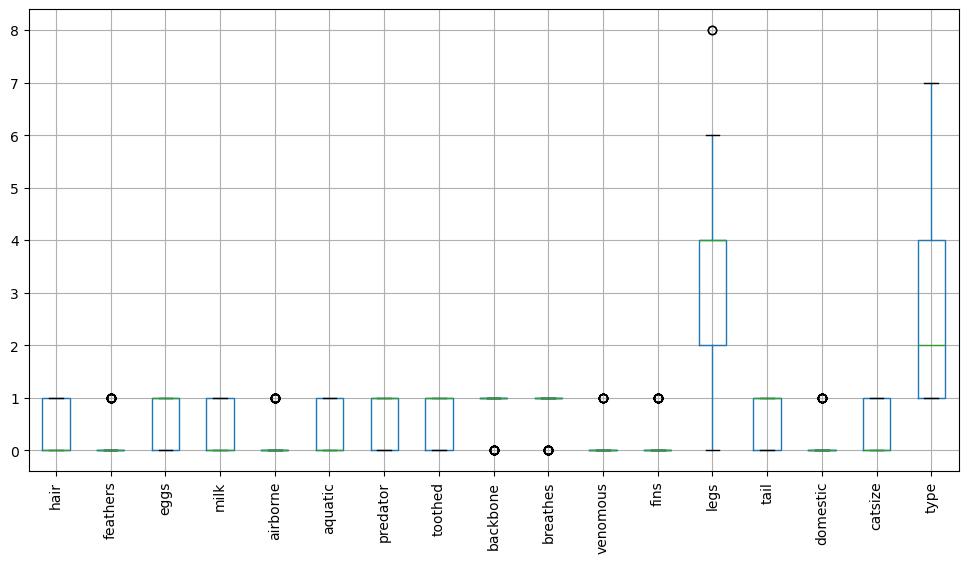

In [38]:
# 2nd Method : Visualize outliers with boxplot. We already did it above in Task 1.
#lets do it again.

plt.figure(figsize=(12, 6))
df.boxplot(rot=90)
plt.show()

#  Task 3: Split the dataset into training and testing sets (80% training, 20% testing).

In [40]:
# lets separate Features and Target.

In [41]:
target= df[['type']]
features= df.drop(columns=['animal name','type'])

In [42]:
# split the dataset into traning and testing

In [43]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 16)
(21, 16)
(80, 1)
(21, 1)


In [45]:
x_train.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
84,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,0
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
43,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
28,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1


In [46]:
y_train.head()

,type
84,1
83,2
43,2
28,1
22,1


# Task 4.Implement the K-Nearest Neighbours algorithm 

In [48]:
knn=KNeighborsClassifier(n_neighbors=3) # lets take 3 

In [49]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
# Prediction using test data
y_pred=knn.predict(x_test)
y_pred

array([2, 4, 5, 1, 1, 5, 1, 2, 2, 2, 1, 6, 1, 5, 6, 1, 4, 1, 2, 2, 1],
      dtype=int64)

In [51]:
# Model Evaluation

In [52]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9523809523809523

In [53]:
# Modl is 95% accurate.

# Task 5. Choose an appropriate distance metric and value for K.

In [55]:
# elbow method

In [56]:
error_rate=[]

In [57]:
# test k in range (1,21)

for k in range(1,21):
 knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
 knn.fit(x_train,y_train)
 y_pred_k = knn.predict(x_test)
 error_rate.append(1-accuracy_score(y_test,y_pred_k))

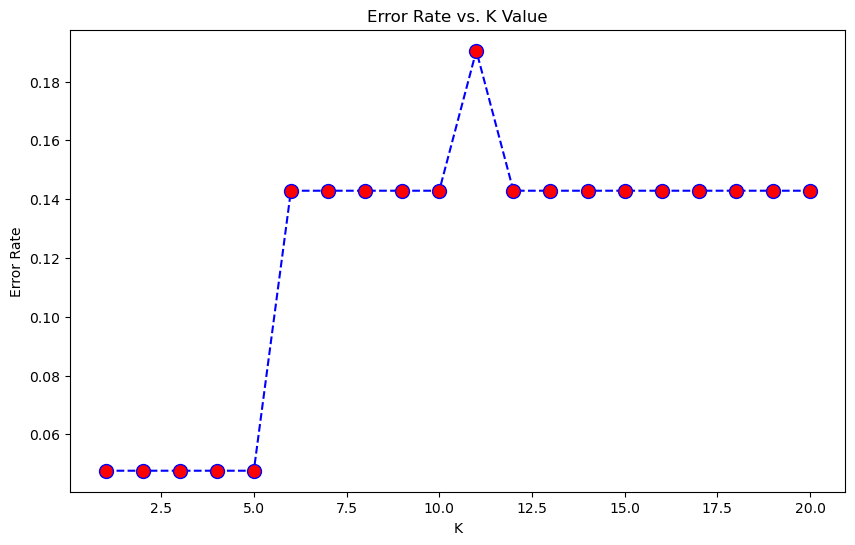

Minimum error:- 0.04761904761904767 at K = 0


In [58]:
# Plot the error rates for different K values
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue', linestyle='--', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

## Grid Search : To find k value

In [60]:
k_value=range(1,21)

In [61]:
params=dict(n_neighbors=k_value)
params

{'n_neighbors': range(1, 21)}

In [62]:
grid_search=GridSearchCV(knn,params)
grid_search

GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=20),
             param_grid={'n_neighbors': range(1, 21)})

In [63]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=20),
             param_grid={'n_neighbors': range(1, 21)})

In [64]:
grid_search.best_params_

{'n_neighbors': 1}

In [65]:
# Grid search gave best k value = 1

# Task 6.Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [67]:
# optimal k value is 1 by grid search

In [68]:
k=1
knn=KNeighborsClassifier(n_neighbors=k, metric='euclidean')

In [69]:
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [70]:
y_pred=knn.predict(x_test)

In [218]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [219]:
# print all scores

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Accuracy: 0.9523809523809523
Precision: 0.9206349206349206
Recall: 0.9523809523809523
F1-Score: 0.9333333333333333


In [224]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



# Task 7. Visualize the decision boundaries of the classifier.

In [75]:
# 1. Reduce data to two components using PCA for visualization purposes

In [76]:
pca=PCA(n_components=2)

In [77]:
x_train_2d=pca.fit_transform(x_train)
x_test_2d=pca.fit_transform(x_test)

In [ ]:
# 2.Train KNN classifier with the optimal K

In [126]:
# we will use knn_2d for 2dimensional features.
knn_2d = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_2d.fit(x_train_2d, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [130]:
# Create a mesh grid for decision boundary plotting
x_min, x_max = x_train_2d[:, 0].min() - 1, x_train_2d[:, 0].max() + 1
y_min, y_max = x_train_2d[:, 1].min() - 1, x_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [132]:
#Predict class labels for each point in the mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [190]:
ListedColormap(['red', 'green', 'blue', 'purple', 'orange'])

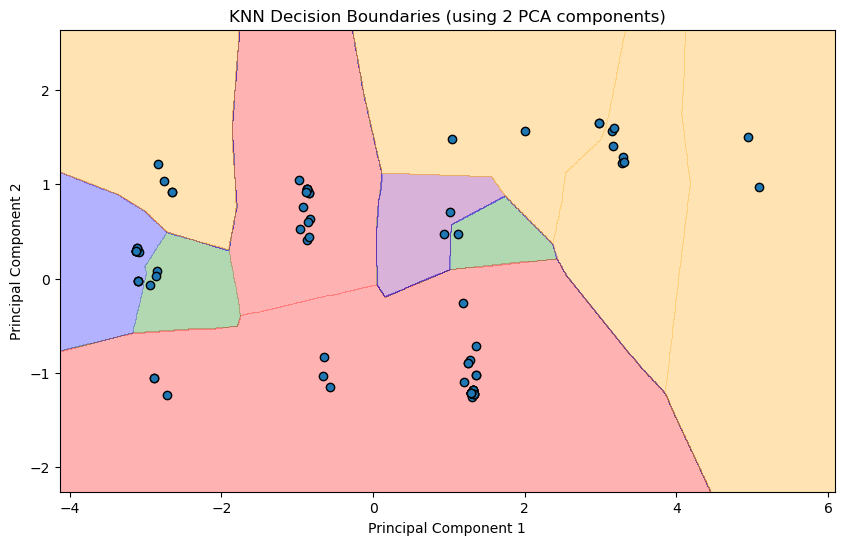

In [216]:
# Plot the decision boundary and scatter plot of the data
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'green', 'blue', 'purple', 'orange']))
plt.scatter(x_train_2d[:, 0], x_train_2d[:, 1], c=None, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries (using 2 PCA components)')
plt.show()

# ----- THE END----